# Distributed Information Systems

***Final Exam, Fall Semester, 2021***

The exam will be held on your computer, but digital communication with other persons by any means is **strictly prohibited**.
The following materials are also allowed: exercise sheets and solutions, past exams with your own solution, personally written notes and personally collected documentation. You may also use Stackoverflow and Python documentation for questions related to Python programming.
By participating in this exam you **agree to these conditions**.

These are the instructions for the exam:

- You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
- The quiz will remain open **only for the first 2 hours** of the exam to avoid network congestion.
- **30 minutes** before the end of the exam we will announce a password to upload your jupyter notebook on **Moodle**.
- It is not recommended to leave the exam before the password is published. If you need to leave earlier, contact us.
- **You must follow the EPFL guidelines and wear your mask when you enter, leave, and move around the exam room.**
- **You have to wear the bracelet for COVID certification at all times.**
- **We would also like to kindly ask you to wear your mask when you ask questions and when we check your camipro card.**

## 0 Rename your Notebook
Replace SciperNo with your **personal SCIPER Number**.

## 1 [Multiple Choice Questions]()
**Password**:

## 2 Link-Based Ranking

*(5 sub-questions)*

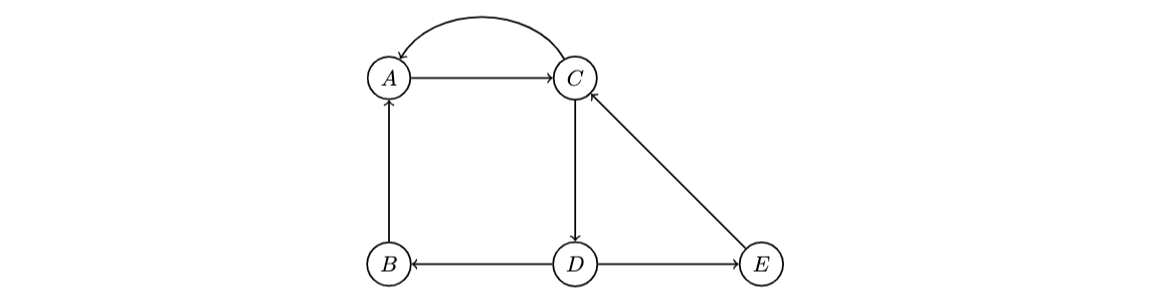

Answer the questions regarding the graph above. You can do the computations either by hand or by using computer.

> **1. You are going to run Pagerank on this graph. What is the link matrix? What does it become after normalizing by the node degrees? (Please explicitly state what do the rows and the columns indicate.)**

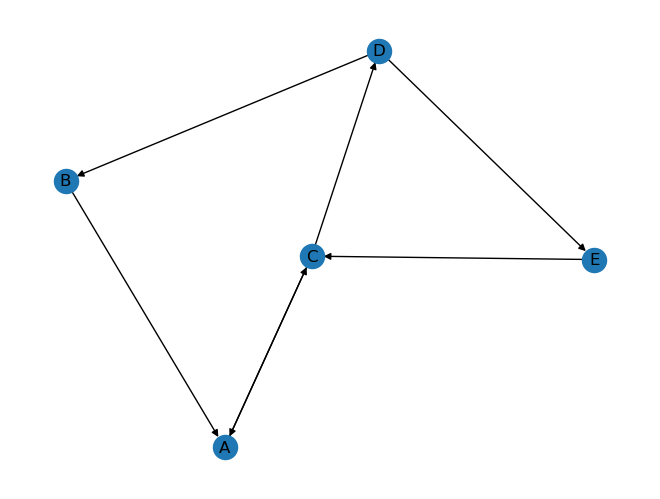

In [14]:
import numpy as np
import networkx as nx
node_names = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
adj = np.array([[0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 0, 0]])
G = nx.from_numpy_array(adj, create_using=nx.DiGraph)
nx.set_node_attributes(G, name='label', values=node_names)
nx.draw(G, labels=node_names)

In [34]:
L = adj.T
print(L)
L_norm = L / L.sum(axis=0)
print(L_norm)
nodes = list(node_names.values())

[[0 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 1 0]]
[[0.  1.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  1. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]]


Link matrix L is the transposed adjacency matrix. Column i denotes links coming from node i, while row j denotes links coming in the node j.

L normalized by column represents at position ij the probability of moving from node i to node j during a random walk in the graph.

> **2. Run Pagerank without teleporting for two iterations. What are the final pagerank scores and the ranking? Show your work. You can assume all pages initially have a pagerank score of 1. Hint: Do not forget to normalize pagerank scores so that they will add up to 1 after each iteration.**

In [35]:
# Let's reuse the function from week 7

def pagerank_iterative(L, q=0.9, n_iters = 100, R=None, e=None):
    if R is None:  # We might want to compute R outside this function to avoid recomputing large matrix
        total_links = np.sum(L,axis=0)
        R = L / np.where(total_links > 0, total_links, 1)
    R = R.copy()
    N = L.shape[0]
    if e is None:
        e = np.ones(shape=(N,1))

    p = np.ones(shape=(N,1)) / N

    epsilon = 0.001
    for i in range(n_iters):
        p_prev = p
        p = q * (R @ p_prev) + (1 - q) / N * e
        p /= np.linalg.norm(p, 1)
        delta = np.linalg.norm(p - p_prev, ord=1)
        if delta <= epsilon:
            print("Converged after {0} iterations. Ranking vector: p={1}".format(i, p[:,0]))
            break

    return R, p.reshape(-1)

In [36]:
R, p = pagerank_iterative(L, q=1, n_iters=2)
ranking = np.argsort(p * -1)
for i, idx in enumerate(ranking):
    print(f'Rank: {i + 1}, node: {nodes[idx]}, page rank value: {p[idx]:.3f}')

Rank: 1, node: C, page rank value: 0.400
Rank: 2, node: A, page rank value: 0.300
Rank: 3, node: D, page rank value: 0.200
Rank: 4, node: B, page rank value: 0.050
Rank: 5, node: E, page rank value: 0.050


> **3. Suppose that the edge (E, C) did not exist. What would be the final ranking?** 

In [37]:
L_without_ec = np.array([[0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 1, 0], [0, 1, 0, 0, 1], [0, 0, 0, 0, 0]]).T
R, p = pagerank_iterative(L_without_ec, q=1, n_iters=2)
ranking = np.argsort(p * -1)
for i, idx in enumerate(ranking):
    print(f'Rank: {i + 1}, node: {nodes[idx]}, page rank value: {p[idx]:.3f}')

Rank: 1, node: C, page rank value: 0.429
Rank: 2, node: A, page rank value: 0.286
Rank: 3, node: D, page rank value: 0.143
Rank: 4, node: B, page rank value: 0.071
Rank: 5, node: E, page rank value: 0.071


> **4. Run Personalized Pagerank with teleporting probability of 1/5. Random jumps are always to node A. Iterate only once. What are the final scores and the ranking?**

In [47]:
R, p = pagerank_iterative(L, q=0.2, n_iters=1, e=np.array([1, 0, 0, 0, 0]).reshape(-1, 1))
ranking = np.argsort(p * -1)
for i, idx in enumerate(ranking):
    print(f'Rank: {i + 1}, node: {nodes[idx]}, page rank value: {p[idx]:.3f}')

Rank: 1, node: A, page rank value: 0.611
Rank: 2, node: C, page rank value: 0.222
Rank: 3, node: B, page rank value: 0.056
Rank: 4, node: D, page rank value: 0.056
Rank: 5, node: E, page rank value: 0.056


> **5. Imagine a new node is connected to the network by a single edge directed to A. How this would affect the result of 2 and 4?**

In [60]:
L_expanded =  np.array([[0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0]]).T
nodes_expanded = nodes + ['F']

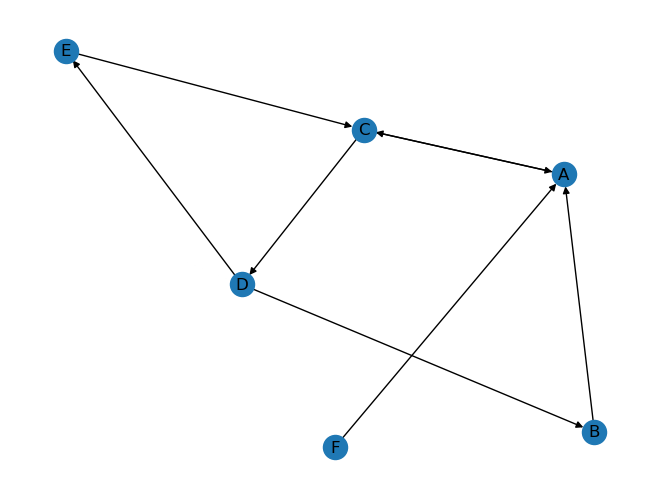

In [61]:
G = nx.from_numpy_array(L_expanded.T, create_using=nx.DiGraph)
nx.set_node_attributes(G, name='label', values=node_names.update({5: 'F'}))
nx.draw(G, labels=node_names)

In [62]:
R, p = pagerank_iterative(L_expanded, q=1, n_iters=2)
ranking = np.argsort(p * -1)
for i, idx in enumerate(ranking):
    print(f'Rank: {i + 1}, node: {nodes_expanded[idx]}, page rank value: {p[idx]:.3f}')

Rank: 1, node: C, page rank value: 0.500
Rank: 2, node: A, page rank value: 0.250
Rank: 3, node: D, page rank value: 0.167
Rank: 4, node: B, page rank value: 0.042
Rank: 5, node: E, page rank value: 0.042
Rank: 6, node: F, page rank value: 0.000


In [64]:
R, p = pagerank_iterative(L_expanded, q=0.2, n_iters=1, e=np.array([1, 0, 0, 0, 0, 0]).reshape(-1, 1))
ranking = np.argsort(p * -1)
for i, idx in enumerate(ranking):
    print(f'Rank: {i + 1}, node: {nodes_expanded[idx]}, page rank value: {p[idx]:.3f}')

Rank: 1, node: A, page rank value: 0.650
Rank: 2, node: C, page rank value: 0.200
Rank: 3, node: B, page rank value: 0.050
Rank: 4, node: D, page rank value: 0.050
Rank: 5, node: E, page rank value: 0.050
Rank: 6, node: F, page rank value: 0.000


## 3 News recommendation

You will create news recommendations for the small news portal aggregator, "*allabouthealthcare.com*", regarding news about healthcare. In this website users can read various news articles regarding healthcare collected from popular healthcare media. 

The developers of the website collect analytics regarding which user has read what article. You are hired to create a recommendation engine that will provide news recommendations to users.

You will first explore the dataset by providing dataset descriptive statistics, and then you will implement various methods for news recommendation.

#### DATASET
You are given two files regarding the news articles consumption of this news portal. 

> 1. **News articles** (*news_articles.txt*): 
>
> This dataset contains information about the news articles collected by the portal.
> The information stored for each article is the following:
>
> - **article id**: The id of the article.
> - **title**: The title of the article.
- **medium**: The news portal the the article was originally published.
- **publish date**: The date of publication of the article.
- **authors**: The names and surnames of authors seperated with comma.
- **corpus**: The main text of the article without any identation.
- **url**: The url of the article.

> 2. **User log** (*user_log.txt*)
>
> This dataset contains the user log of *allabouthealthcare.com*. 
> The information stored for each row is the following:
>
> - **user id**: The id of the user.
- **article id**: The id of the article the user read.


### 3.1 Understanding the dataset
*(5 sub-questions)*

You need to compute the following descriptive statistics for the aforementioned dataset.

In [65]:
# import libraries
import pandas as pd
import numpy as np

# read the dataset
articles = pd.read_csv('data/news_articles.txt', sep='|').fillna('')
log = pd.read_csv('data/user_log.txt', sep='|')

In [66]:
articles.head()

,article_id,title,medium,publish_date,authors,corpus,url
0,0,how address inequity healthcare ai hire divers...,www.healthcareitnews.com,2022-01-13T09:05:39-05:00,Kat Jercich,even artificial intelligence become thoroughly...,https://www.healthcareitnews.com/news/how-addr...
1,1,cyberattack red cross endangers confidential i...,www.healthcareitnews.com,2022-01-21T12:06:48-05:00,Kat Jercich,the red cross reported week cyberattack contra...,https://www.healthcareitnews.com/news/cyber-at...
2,2,like banks healthcare become zoom healthcare l...,www.healthcareitnews.com,2022-01-20T12:43:10-05:00,Bill Siwicki,digital transformation topic jour healthcare t...,https://www.healthcareitnews.com/news/banks-he...
3,3,why voice recognition new competitive battlegr...,www.healthcareitnews.com,2022-01-20T12:24:54-05:00,Paddy Padmanabhan,for watching based artificial intelligence too...,https://www.healthcareitnews.com/blog/why-voic...
4,4,biden team regroups court loss covid,www.modernhealthcare.com,2022-01-14T17:30:38-05:00,Associated Press,concerned giving president joe biden anxiously...,https://www.modernhealthcare.com/politics-poli...


In [67]:
log.head()

,user_id,article_id
0,0,0
1,0,1
2,0,2
3,0,4
4,0,13


> **3.1.1. Compute the top 20 word occurencies from the corpora of all the articles (provide the result sorted)**

In [73]:
from collections import Counter
articles['words'] = articles.corpus.str.split(' ')
vocabulary =Counter(sum(articles['words'], []))
print('Top 20 words:')
print(vocabulary.most_common(20))


Top 20 words:
[('said', 131), ('health', 118), ('healthcare', 105), ('the', 96), ('patients', 59), ('people', 49), ('new', 43), ('covid', 42), ('data', 41), ('it', 41), ('ibm', 40), ('company', 37), ('we', 35), ('medical', 31), ('hospitals', 29), ('watson', 26), ('in', 24), ('patient', 24), ('clinical', 24), ('need', 23)]


> **3.1.2. Compute the top 3 most published media (provide the result sorted)**

In [78]:
print('Most published media:')
articles.medium.value_counts(sort=True, ascending=False)[:3]

Most published media:


www.bbc.com                 13
www.fiercehealthcare.com     8
www.modernhealthcare.com     5
Name: medium, dtype: int64

> **3.1.3. Compute the percentage of articles that are writen by only one author**

In [85]:
articles['n_authors'] = articles.authors.str.split(',').apply(lambda x: 0 if x == [''] else len(x))
articles.sample(5)
n_articles_with_one_author = sum(articles['n_authors'] == 1)
n_articles_with_unk_author = sum(articles['n_authors'] == 0)
print(f'Number of articles with one author: {n_articles_with_one_author}, share of the total articles: {n_articles_with_one_author / len(articles):.3f}, articles where the number of authors is unknown: {n_articles_with_unk_author}')

Number of articles with one author: 19, share of the total articles: 0.633, articles where the number of authors is unknown: 8


> **3.1.4. Compute the top 3 most active users**

In [105]:
log.groupby('user_id').count().rename(columns={'article_id': 'n articles read'}).sort_values(by='n articles read', ascending=False)[:3]

,n articles read
user_id,
0,12
2,12
1,11


> **3.1.5. Compute the top 5 most read news articles**

In [106]:
log.groupby('article_id').count().rename(columns={'user_id': 'n users read'}).sort_values(by='n users read', ascending=False)[:5]

,n users read
article_id,
4,4
6,3
7,3
8,3
9,3


### 3.2 Item-based collaborative filtering
*(3 sub-questions)*

Now that we have prepared the data, our next mission is to create a recommender system following the paradigm of Item-based Collaborative Filtering. In this case, this is translated into "Users who read this news article also read …".


In order to make predictions, we will apply the following formula, where 
$N_I(a)$ is the set of neighbors of article $a_1$, and $a_2$ is an article viewed by user $x$.


\begin{equation}
{r}_{x}(a_1) =  \frac{\sum\limits_{a_2 \in N_{I}(a_1)} sim(a_1, a_2) r_{x}(a_2)}{\sum\limits_{a_2 \in N_{I}(a_1)}|sim(a_1, a_2)|}
\end{equation}


> **3.2.1 Compute the user-article matrix which should be a 2D numpy array, with each row corresponding to a user and each column to an article. The value of its cell indicates whether the user has read the corresponding article.**

In [111]:
def build_id_to_index(col):
    ids = sorted(col.unique())
    id_to_index = {id: i for i, id in enumerate(ids)}
    return id_to_index

In [116]:
n_users = len(log['user_id'].unique())
n_items= len(articles)

user_article = np.zeros((n_users, n_items))

# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# add 1 in data_matrix for each article a user has read

user_id_to_index = build_id_to_index(log.user_id)
item_id_to_index = build_id_to_index(log.article_id)
for _, (u, a) in log.iterrows():
    user_article[u][a] = 1
user_article

array([[1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

> **3.2.2 Compute the similarity matrix using cosine similarity metric**

In [117]:
# magnitude = sqrt(x2 + y2 + z2 + ...)
user_article_df = pd.DataFrame(user_article)
magnitude = np.sqrt(np.square(user_article_df).sum(axis=1))

# unitvector = (x / magnitude, y / magnitude, z / magnitude, ...)
user_article_df = user_article_df.divide(magnitude, axis='index')
user_article_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.288675,0.288675,0.288675,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.288675,0.288675,0.288675,0.288675,0.000000,0.0,0.288675,0.288675,0.0
1,0.301511,0.301511,0.301511,0.301511,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.301511,0.0,0.301511,0.301511,0.0
2,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.288675,0.288675,0.288675,0.288675,...,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248,0.408248,0.408248,0.408248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [121]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(data_items):
    """
    Calculate the column-wise cosine similarity for a sparse
    matrix.
    Return a new dataframe matrix with similarities.
    """

    res_mtx = cosine_similarity(data_items.T)
    similarity_df = pd.DataFrame(res_mtx)
    return similarity_df

# Build the similarity matrix
similarity_matrix = calculate_similarity(user_article_df)

# Lets get the top 5 similar articles for article with id 4
similarity_matrix.iloc[4].nlargest(5)

4    1.000000
6    0.901388
7    0.901388
8    0.901388
9    0.901388
Name: 4, dtype: float64

> **3.2.3 Predict the top 5 recommendations for the user with id 4 using item-based collaborative filtering**

In [182]:
user_id = 4 # The id of the user for whom we want to generate recommendations

# Get the articles the user has read.
user_articles = list(log[log['user_id']==user_id]['article_id'].unique())

# User article log
user_article_log_vector = user_article_df.iloc[user_id]

In [189]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Calculate the score.
sims = similarity_matrix @ user_article_log_vector / similarity_matrix.sum(axis=1)
print(sims.shape)
scores = sims.drop(user_articles)
scores.nlargest(10)
# ---------------------------------------------------

(30,)


14    0.190211
16    0.190211
17    0.190211
18    0.148400
19    0.148400
20    0.148400
15    0.018448
21    0.018448
22    0.018448
23    0.018448
dtype: float64

### 3.3 Content-based recommendations
*(6 sub-questions)*

The next mission we have is to create a recommender system following the paradigm of the Content-based recommendation approach. In this case, we will also exploit information related to the content of the articles.

As a first step, we will compute the tf-idf weights of the articles.

\begin{equation}
w(t, a) = tf(t, a) \cdot idf(t) = \frac{freq(t, a)}{\max_{s\in T} freq(s, a)} \cdot log(\frac{N}{n(t)})
\end{equation}

Then in order to do predictions, we need to estimate the probability of article $a$ not yet seen by user $x$. To do so, we find the nearest neighbours of $a$ in the subset of articles that have been already seen by the user $x$.

\begin{equation}
r_x(a_1) = \frac{\sum_{a_2\in N_I(a_1)} sim(a_1, a_2) \cdot r_x(a_2)}{\sum_{a_2\in N_I(a_1)} |sim(a_1, a_2)|}
\end{equation}


Find the articles with the most Knn's that are present in the history of the user, aka find the articles that are most similar to the articles that the user has already seen.
- for articles not read by user
- get recommendations
- rank the articles based on the amount of articles present in the "already seen" list of the user


> **3.3.1 Compute tf-idf values for the main corpus of the articles and print the shape of the final matrix**

In [229]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=2, stop_words='english')
tf_idf_matrix = vectorizer.fit_transform(articles.corpus)
# ---------------------------------------------------
tf_idf_matrix.shape

(30, 945)

> **3.3.2 Create the vocabulary of all the articles (as a list) and print the 5 most common words**

In [230]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

from collections import Counter
articles['words'] = articles.corpus.str.split(' ')
vocabulary =Counter(sum(articles['words'], []))
print('Top 5 words:')
print(vocabulary.most_common(5))
# ---------------------------------------------------

Top 5 words:
[('said', 131), ('health', 118), ('healthcare', 105), ('the', 96), ('patients', 59)]


> **3.3.3 Find the term with highest TF-IDF value for the article with id 4.**

In [234]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

highest_idx = np.argmax(tf_idf_matrix[5])
for term, idx in vectorizer.vocabulary_.items():
    if idx == highest_idx:
        print(f'Term with the highest idx: {term}')

Term with the highest idx: ibm


> **3.3.4 Create a function that finds the best 5 recommendations for any given article and print the best 5 recommendations for article with id 4**

In [257]:
def get_recommendations(i, similarities, k=5):
    """
    Recommends articles based on a similarity dataframe
    Parameters
    ----------
    i : int
        Article index of the similarity dataframe
    similarities : pd.DataFrame
        Similarity dataframe, symmetric, with articles as indices and columns
    k : int
        Amount of recommendations to return
    Returns
    -------
    pd.DataFrame with the top k recommendations
    """
    item_sims = similarities[i].values
    most_sim_ids = list(item_sims.argpartition(range(-1,-k,-1))[-k-1:])
    most_sim_ids.remove(i)

    res = pd.DataFrame({'most sim ids': most_sim_ids, 'similarity values': item_sims[most_sim_ids].reshape(-1)}) 
    return res   

# create similarity
cosine_sim = cosine_similarity(tf_idf_matrix)

# get recommendations for article with id 4
corpus_id_4 = articles[articles['article_id']==4]['corpus'].values[0]
recommendations = get_recommendations(4, pd.DataFrame(cosine_sim))
recommendations.head()

,most sim ids,similarity values
0,29,0.161208
1,8,0.232659
2,20,0.253344
3,7,0.255304
4,15,0.500060


> **3.3.5 Find the articles that user with id 4 has NOT yet read and print the count of them**

In [270]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
article_to_recommend = set(articles.article_id.unique()).difference(set(user_articles))
# ---------------------------------------------------
len(article_to_recommend)

24

> **3.3.6 Predict top 5 recommendations for user with id 4**

In [269]:
print(len(user_articles))

6


In [283]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
top_similar = len(user_articles)
candidates = {}

user_articles = log[log['user_id']==4]['article_id'].unique()
print(user_articles)

for i in article_to_recommend:
    recommendations = get_recommendations(i, pd.DataFrame(cosine_sim), k=top_similar)
    articles_matched = len(set(recommendations['most sim ids']).intersection(user_articles))
    candidates[i] = articles_matched
top_5 = sorted(candidates.items(), key=lambda x: -x[1])[:5]
print(top_5)
top_5_ids = [i for i, _ in top_5]
articles.loc[top_5_ids]

[ 4  6  7  8  9 10]
[(18, 4), (28, 4), (11, 3), (13, 3), (19, 3)]


,article_id,title,medium,publish_date,authors,corpus,url,words,n_authors
18,18,was south africa ignored mild covid evidence,www.bbc.com,2022-01-20T00:08:25.000Z,"Andrew Harding,Natalie Sherman",we need learn our research rigorous everyone e...,https://www.bbc.com/news/world-africa-60039138,"[we, need, learn, our, research, rigorous, eve...",2
28,28,nearly people may gotten slightly lower pfizer...,www.fiercehealthcare.com,"Jan 20, 2022 4:50pm",Anastassia Gliadkovskaya,nearly people may received slightly less recom...,https://www.fiercehealthcare.com/hospitals/kai...,"[nearly, people, may, received, slightly, less...",1
11,11,the puzzle america record covid hospital rate,www.bbc.com,2022-01-13T15:37:03.000Z,,what numbers show what impact hospitals why us...,https://www.bbc.com/news/world-us-canada-59960949,"[what, numbers, show, what, impact, hospitals,...",0
13,13,covid quebec impose health tax unvaccinated ca...,www.bbc.com,2022-01-11T23:18:44.000Z,,quebec seen highest number deaths canada curre...,https://www.bbc.com/news/world-us-canada-59960689,"[quebec, seen, highest, number, deaths, canada...",0
19,19,covid face mask rules covid passes england,www.bbc.com,2022-01-19T19:26:51.000Z,"Marie Jackson,Mary O'Connor",but said seen finish line virus future variant...,https://www.bbc.com/news/uk-60047438,"[but, said, seen, finish, line, virus, future,...",2


### 3.4 Association rules
*(3 sub-questions)*

Now we would like to identify frequent rules that govern how words appear together in the news article **titles**.

We provide every observed pair of words containing "covid" (we only consider rules of size 2).
You need to provide every observed pair of words containing "covid" (we only consider rules of size 2).


* Compute **support** and **confidence** for the rules X -> covid, where X is a word appearing with covid in the given set of pairs.
* From the confidence of the rules you obtained, compute **lift**.
* Show the 5 rules with **highest confidence** and the 5 rules with **highest lift** with the provided code. 

In [284]:
titles = articles['title'].apply(lambda x: x.lower().split(' '))

> **3.4.1 Compute support and confidence for the rules X -> covid, where X is a word appearing with covid in an article.**

In [301]:
head = 'covid'
bodies = set()
for title in titles:
    if head in title:
        bodies.update(set(title))
bodies.remove('covid')
print(bodies)


{'canadians', 'evidence', 'spotlight', 'was', 'mandatory', 'rise', 'pandemic', 'cdc', 'some', 'disparities', 'warns', 'vaccination', 'undermining', 'dose', 'health', 'endgame', 'america', 'antibody', 'order', 'passes', 'loss', 'amid', 'shots', 'states', 'puzzle', 'rate', 'africa', 'record', 'still', 'court', 'starts', 'mild', 'booster', 'is', 'case', 'cityblock', 'ajayi', 'chile', 'patient', 'entering', 'records', 'regroups', 'week', 'face', 'treatments', 'problems', 'austrian', 'rules', 'vaccine', 'biden', 'mask', 'show', 'build', 'hospital', 'cases', 'the', 'ignored', 'studies', 'beware', 'quebec', 'surge', 'tax', 'who', 'jpm', 'fourth', 'approves', 'unvaccinated', 'needed', 'ineffective', 'endemic', 'europe', 'pushing', 'team', 'south', 'parliament', 'fierce', 'impose', 'england'}


In [305]:
from collections import defaultdict
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
support    = defaultdict(int)
confidence = defaultdict(int)
# ---------------------------------------------------

sup_head = 0
for title in titles:
    for body in bodies:
        support[body] += (body in title) and (head in title)
        confidence[body] += (body in title)
    sup_head += (head in title)


In [306]:
print(confidence)

defaultdict(<class 'int'>, {'canadians': 1, 'evidence': 1, 'spotlight': 1, 'was': 1, 'mandatory': 1, 'rise': 1, 'pandemic': 2, 'cdc': 1, 'some': 1, 'disparities': 1, 'warns': 1, 'vaccination': 1, 'undermining': 1, 'dose': 2, 'health': 7, 'endgame': 1, 'america': 1, 'antibody': 1, 'order': 2, 'passes': 1, 'loss': 1, 'amid': 2, 'shots': 1, 'states': 1, 'puzzle': 1, 'rate': 1, 'africa': 1, 'record': 1, 'still': 1, 'court': 2, 'starts': 1, 'mild': 1, 'booster': 1, 'is': 1, 'case': 1, 'cityblock': 1, 'ajayi': 1, 'chile': 1, 'patient': 2, 'entering': 1, 'records': 1, 'regroups': 1, 'week': 2, 'face': 1, 'treatments': 1, 'problems': 1, 'austrian': 1, 'rules': 1, 'vaccine': 2, 'biden': 2, 'mask': 1, 'show': 1, 'build': 1, 'hospital': 1, 'cases': 1, 'the': 2, 'ignored': 1, 'studies': 1, 'beware': 1, 'quebec': 1, 'surge': 1, 'tax': 1, 'who': 1, 'jpm': 2, 'fourth': 1, 'approves': 1, 'unvaccinated': 1, 'needed': 1, 'ineffective': 1, 'endemic': 1, 'europe': 1, 'pushing': 1, 'team': 2, 'south': 1, '

In [307]:
print(support)

defaultdict(<class 'int'>, {'canadians': 1, 'evidence': 1, 'spotlight': 1, 'was': 1, 'mandatory': 1, 'rise': 1, 'pandemic': 2, 'cdc': 1, 'some': 1, 'disparities': 1, 'warns': 1, 'vaccination': 1, 'undermining': 1, 'dose': 1, 'health': 3, 'endgame': 1, 'america': 1, 'antibody': 1, 'order': 1, 'passes': 1, 'loss': 1, 'amid': 2, 'shots': 1, 'states': 1, 'puzzle': 1, 'rate': 1, 'africa': 1, 'record': 1, 'still': 1, 'court': 1, 'starts': 1, 'mild': 1, 'booster': 1, 'is': 1, 'case': 1, 'cityblock': 1, 'ajayi': 1, 'chile': 1, 'patient': 1, 'entering': 1, 'records': 1, 'regroups': 1, 'week': 1, 'face': 1, 'treatments': 1, 'problems': 1, 'austrian': 1, 'rules': 1, 'vaccine': 1, 'biden': 1, 'mask': 1, 'show': 1, 'build': 1, 'hospital': 1, 'cases': 1, 'the': 1, 'ignored': 1, 'studies': 1, 'beware': 1, 'quebec': 1, 'surge': 1, 'tax': 1, 'who': 1, 'jpm': 1, 'fourth': 1, 'approves': 1, 'unvaccinated': 1, 'needed': 1, 'ineffective': 1, 'endemic': 1, 'europe': 1, 'pushing': 1, 'team': 1, 'south': 1, '

> **3.4.2 From the confidence of the rules you obtained, compute lift.**

In [295]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
lift = dict()
# ---------------------------------------------------
for body in bodies:
    lift[body] = confidence[body] / sup_head

> **3.4.3 Show the 5 rules with highest confidence and the 5 rules with highest lift with the provided code.**

In [296]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Print confidence
{k: v for k, v in sorted(confidence.items(), key=lambda item: item[1], reverse=True)[:5]}

{'canadians': 1.0,
 'evidence': 1.0,
 'spotlight': 1.0,
 'was': 1.0,
 'mandatory': 1.0}

In [297]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Print lift
{k: v for k, v in sorted(lift.items(), key=lambda item: item[1], reverse=True)[:5]}

{'canadians': 0.07692307692307693,
 'evidence': 0.07692307692307693,
 'spotlight': 0.07692307692307693,
 'was': 0.07692307692307693,
 'mandatory': 0.07692307692307693}

## 4 [Submit your notebook]()